<a href="https://colab.research.google.com/github/owen-wang-student/tensorflow-practice/blob/main/non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create Dataset

In [16]:
# Import required libraries
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix

(200, 2) (200,)


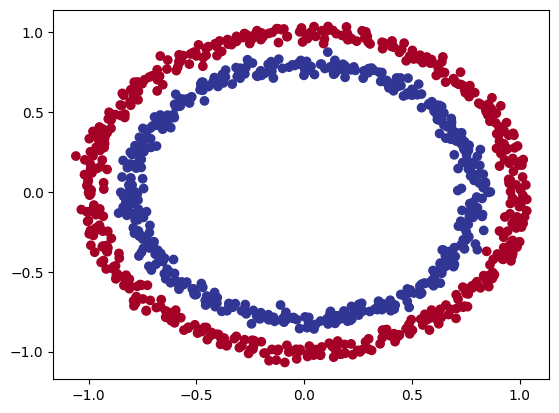

In [5]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

# Create test and train data set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

print(X_test.shape, y_test.shape)

# Visualize dataset with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Create Model

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

## Evaluate Model


In [8]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9664 - loss: 0.0818


[0.07553070038557053, 0.9649999737739563]

## Visualize Model


In [10]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
      print("doing multiclass classification...")
      # We have to reshape our predictions to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classifcation...")
      y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classifcation...


Text(0.5, 1.0, 'Test')

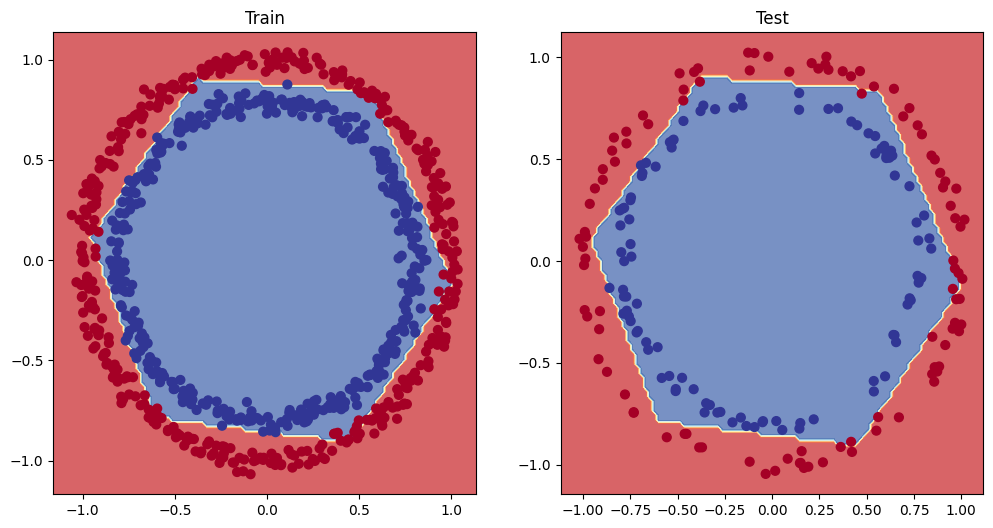

In [11]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # rows, cols, index
plot_decision_boundary(model, X_train, y_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_test, y_test)
plt.title("Test")

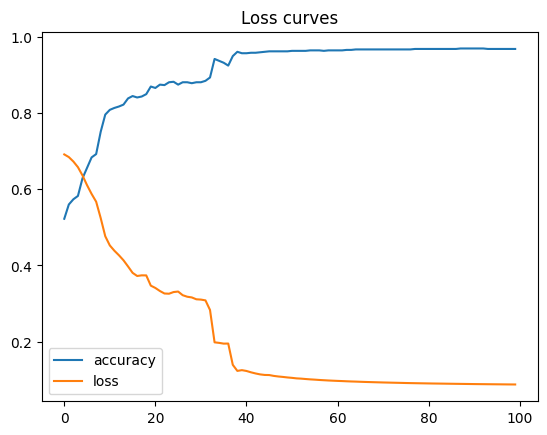

In [14]:
# Plot the losses of training curves

# Convert the history object into a dataframe
pd.DataFrame(history.history)

# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Loss curves")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


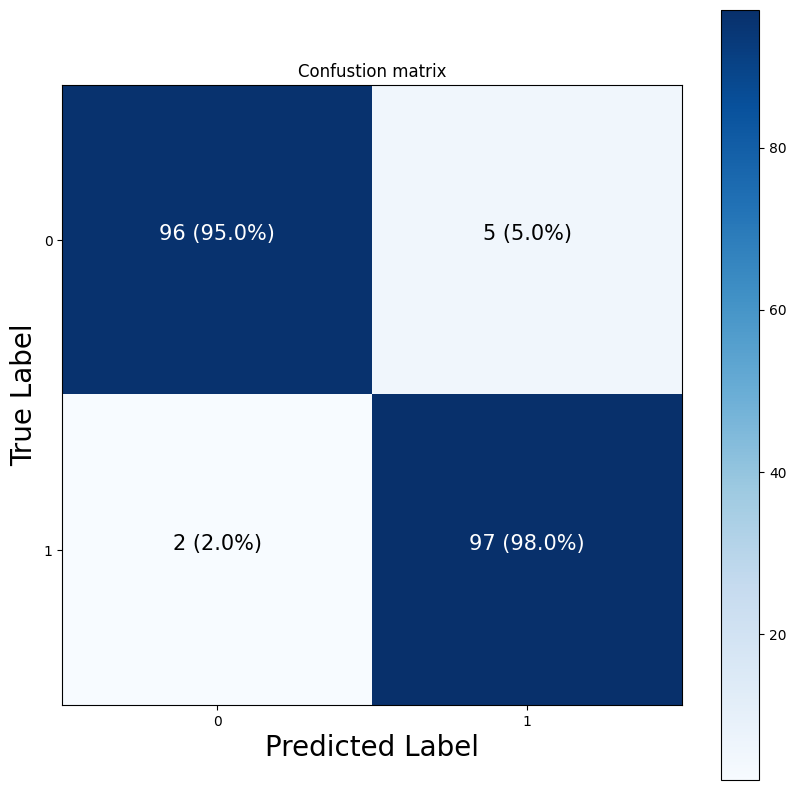

In [17]:
figsize = (10, 10)

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if(classes):
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Label the axes
ax.set(title="Confustion matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)